In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


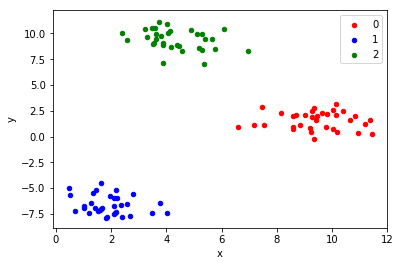

In [2]:
# create dataset 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


In [3]:
import collections
class kNearestNeighbors(object):
    def __init__(self,X,y):
        self.Xtrain = X
        self.ytrain = y
    
    def distance(self,point,k):
        dist = np.sqrt(np.sum((self.Xtrain - point)**2,axis=1))
        return np.argsort(dist)[0:k]
    def predict(self,X_test,k=1):
        num_tests = X_test.shape[0]
        #Ypred = np.zeros(num_tests)
        result=[]
        for i in range(num_tests):
            
            distances = self.distance(X_test.iloc[i,:],k).tolist()
            labels = self.ytrain.loc[distances].tolist()
            k_closest = labels[:k]
            """results=[]
            for  index in distances:
                
                results.append(self.ytrain.loc[index])"""
            """label = collections.Counter(k_closest).most_common(1)[0][0]
            Ypred[i] = label"""
            c = collections.Counter(k_closest)
            
            result.append(c.most_common(1)[0][0])

        return(result)
    
            
        

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.1, random_state=42)

In [5]:
knn = kNearestNeighbors(X_train,y_train)

In [6]:
y_pred = knn.predict(X_test,15)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [7]:
y_pred

[1.0, 0.0, 1, 1.0, 0.0, 1.0, 1.0, 2, 1.0, 0.0]

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5